In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Data Cleaning and Feature Generation

In [6]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

* Dropping Z_Revenue and Z_CostContact as they have same value throughout the data and doesnot provide any usefull insight about data. Hence dropping these features.

In [7]:
df.drop(['Z_CostContact', 'Z_Revenue'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

* Imputing missing value for Income column

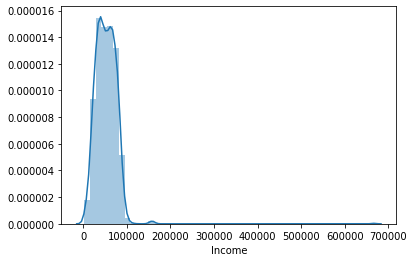

In [9]:
sns.distplot(df['Income'])
plt.show()

In [10]:
df['Income'] = df['Income'].fillna(df['Income'].median())

* Creating new feature for total accepted offer in all campaigns

In [11]:
df['Campaign_accepted']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [12]:
df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response']
        ,axis=1,inplace=True)

* Creating new feature for total amount spent on buying products from website in last 2 years

In [13]:
df['Purchase__amount']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [14]:
df.drop(['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
        ,axis=1,inplace=True)

* Creating new feature for total number of purchase

In [15]:
df['Total_purchase']=df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [16]:
df.drop(['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'],axis=1,inplace=True)

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Campaign_accepted,Purchase__amount,Total_purchase
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,7,0,1,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,5,0,0,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,4,0,0,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,6,0,0,53,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,5,0,0,422,19


* Creating new feature age (as in 2021) using Year_Birth 

In [18]:
df['Age']=2021-df['Year_Birth']

In [19]:
df.drop(['Year_Birth'],axis=1,inplace=True)

* Dividing education in 2 class 

In [20]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [21]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

* dividing marital stauts in single or not single

In [22]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [23]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Not_single')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

* Creating new column for total kids in home

In [24]:
df['total_kids']=df['Kidhome']+df['Teenhome']

In [25]:
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

* Creating new column to show number of months the customer is using website servive

In [26]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [27]:
df['2021']='01-01-2021'

In [28]:
df['2021']=pd.to_datetime(df['2021'])

In [29]:
df['Customer_year']=(df['2021'].dt.year)-(df['Dt_Customer'].dt.year)

In [30]:
df.drop(['Dt_Customer','2021'],axis=1,inplace=True)

In [31]:
df.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
0,5524,PG,Single,58138.0,58,7,0,1,1617,25,64,0,9
1,2174,PG,Single,46344.0,38,5,0,0,27,6,67,2,7
2,4141,PG,Not_single,71613.0,26,4,0,0,776,21,56,0,8
3,6182,PG,Not_single,26646.0,26,6,0,0,53,8,37,1,7
4,5324,PG,Not_single,58293.0,94,5,0,0,422,19,40,1,7


# EDA

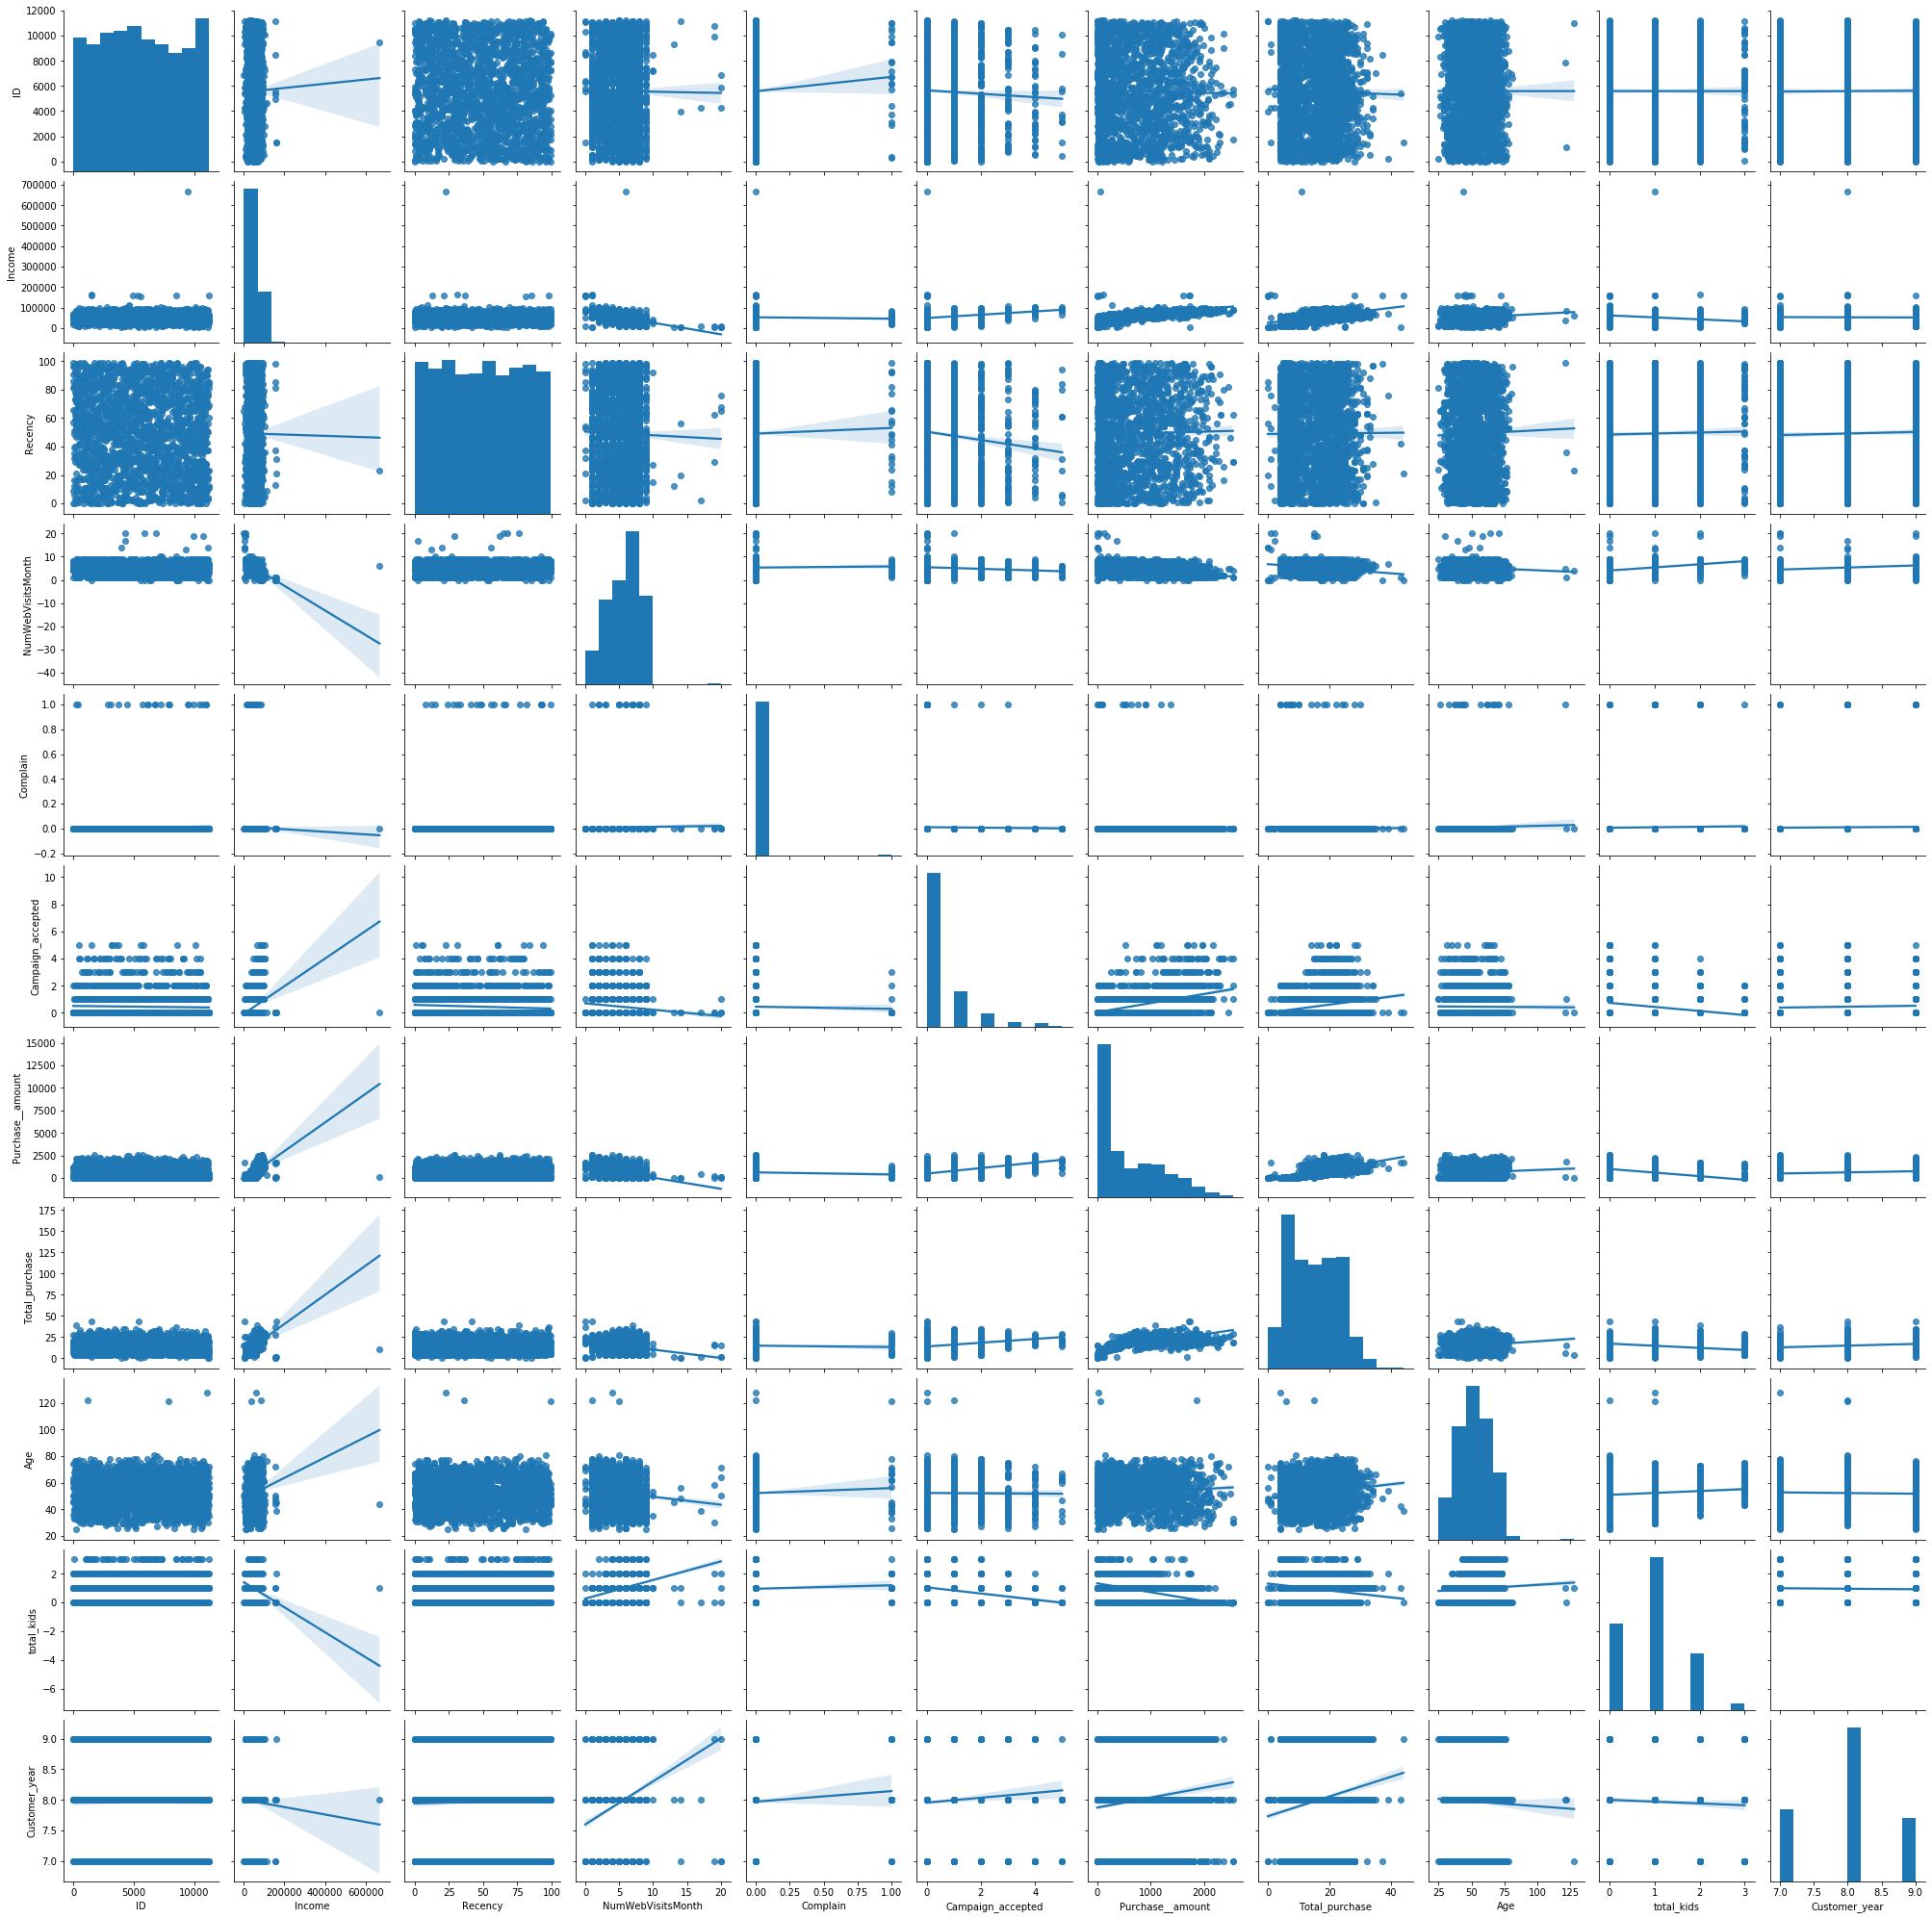

In [32]:
sns.pairplot(df,kind='reg')
plt.show()

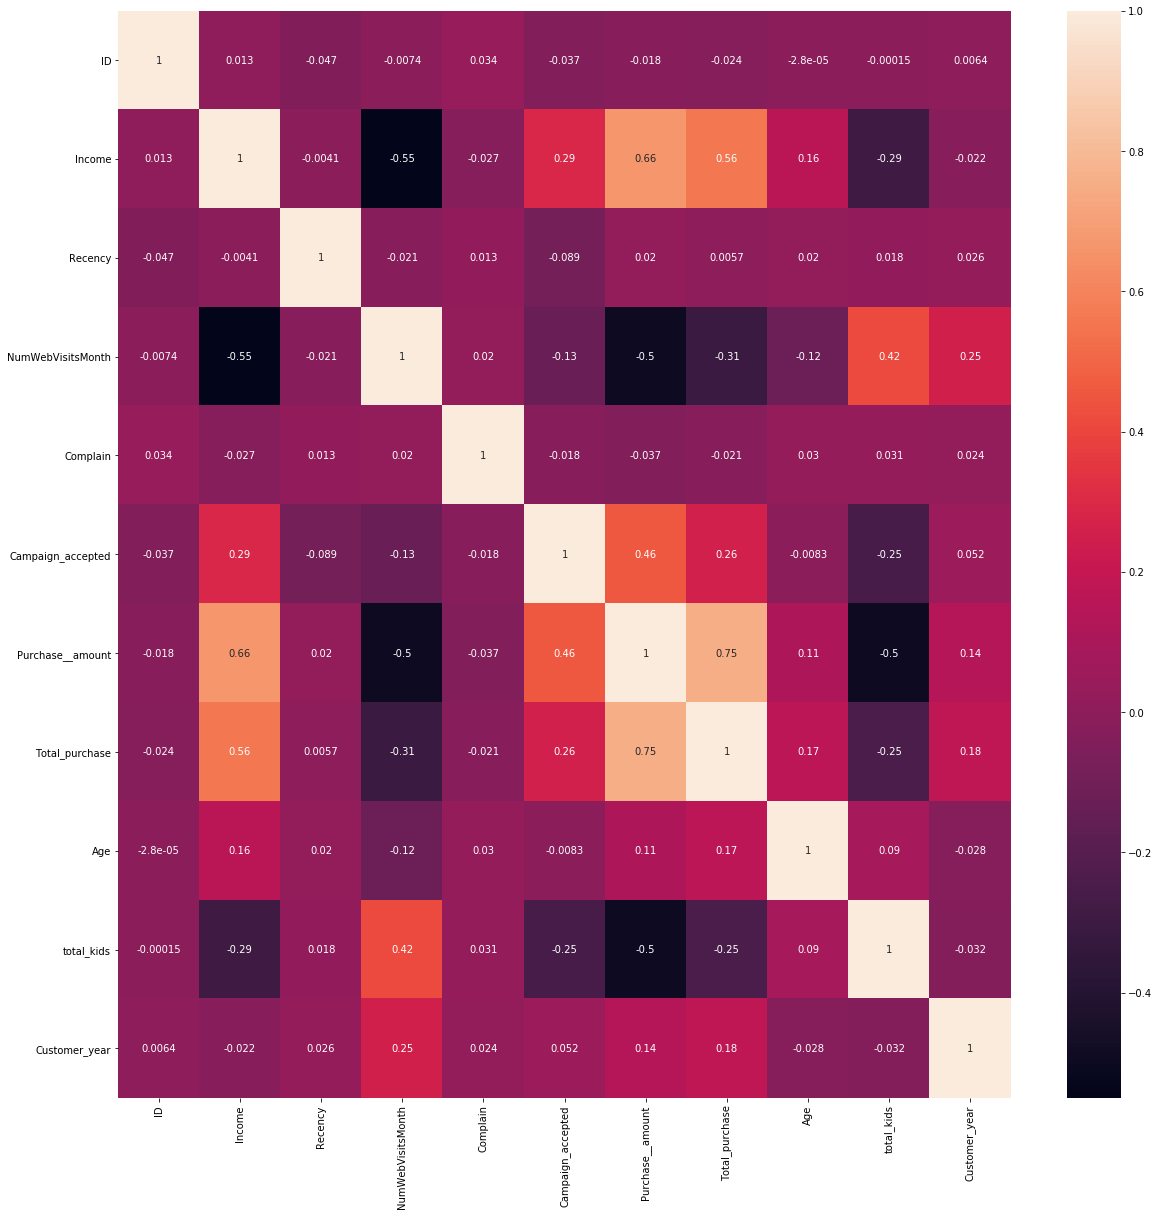

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

## univariate analysis

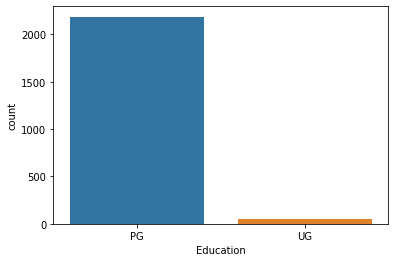

In [34]:
sns.countplot(df['Education'])
plt.show()

In [35]:
df.groupby(['Education'])['Education'].count()

Education
PG    2186
UG      54
Name: Education, dtype: int64

* less number of UG customer

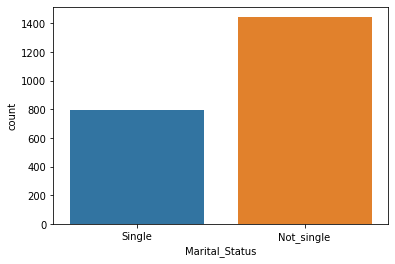

In [36]:
sns.countplot(df['Marital_Status'])
plt.show()

In [37]:
df.groupby(['Marital_Status'])['Marital_Status'].count()

Marital_Status
Not_single    1444
Single         796
Name: Marital_Status, dtype: int64

* Less number of Single customer

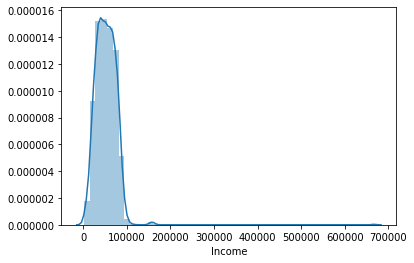

In [38]:
sns.distplot(df['Income'])
plt.show()

In [39]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [40]:
df[df['Income']>400000]

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
2233,9432,PG,Not_single,666666.0,23,6,0,0,62,11,44,1,8


In [41]:
df.drop(df[df['Income']>400000].index,inplace=True)

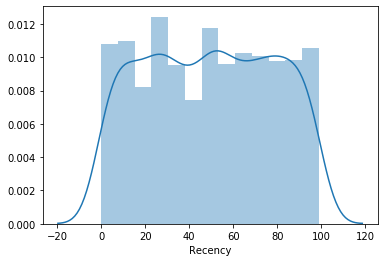

In [42]:
sns.distplot(df['Recency'])
plt.show()

In [43]:
df['Recency'].describe()

count    2239.000000
mean       49.121036
std        28.963662
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

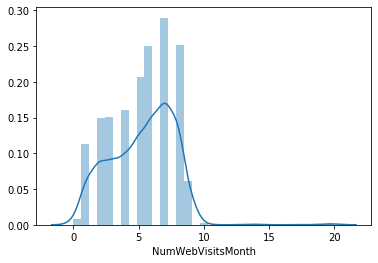

In [44]:
sns.distplot(df['NumWebVisitsMonth'])
plt.show()

In [45]:
df['NumWebVisitsMonth'].describe()

count    2239.000000
mean        5.316213
std         2.427144
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

It is better to remove this feature because this doesnot provide any customer beahvaiour collectively.

In [46]:
df.drop(['NumWebVisitsMonth'],axis=1,inplace=True)

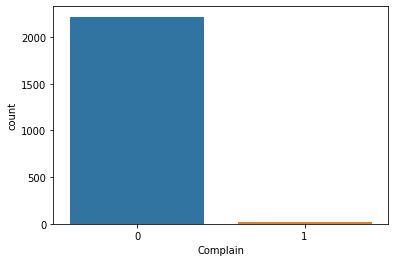

In [47]:
sns.countplot(df['Complain'])
plt.show()

In [48]:
df.groupby(['Complain'])['Complain'].count()

Complain
0    2218
1      21
Name: Complain, dtype: int64

Very low number of complaints, hence it is better to remove from the data

In [49]:
df.drop(['Complain'],axis=1,inplace=True)

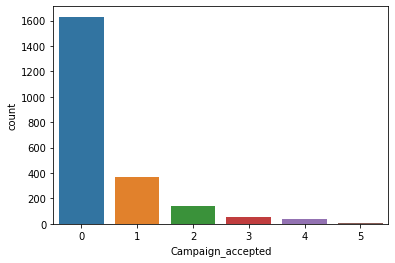

In [50]:
sns.countplot(df['Campaign_accepted'])
plt.show()

In [51]:
df.groupby(['Campaign_accepted'])['Campaign_accepted'].count()

Campaign_accepted
0    1630
1     370
2     142
3      51
4      36
5      10
Name: Campaign_accepted, dtype: int64

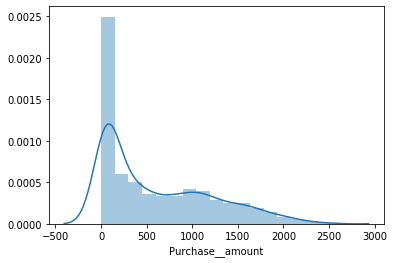

In [52]:
sns.distplot(df['Purchase__amount'])
plt.show()

In [53]:
df['Purchase__amount'].describe()

count    2239.000000
mean      606.041090
std       602.274089
min         5.000000
25%        69.000000
50%       396.000000
75%      1046.000000
max      2525.000000
Name: Purchase__amount, dtype: float64

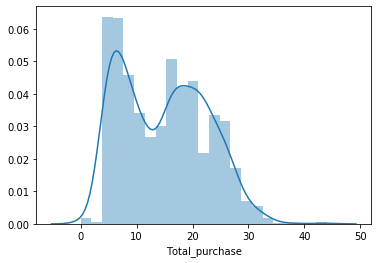

In [54]:
sns.distplot(df['Total_purchase'])
plt.show()

In [55]:
df['Total_purchase'].describe()

count    2239.000000
mean       14.863778
std         7.678453
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Total_purchase, dtype: float64

In [56]:
df[df['Total_purchase']==0][['Total_purchase','Purchase__amount']]

,Total_purchase,Purchase__amount
655,0,6
981,0,6
1524,0,5
2132,0,8


Well this does not make any sense that Total purchase is 0 and number of purchase is more than 0. Hence dropping these 4 entries

In [57]:
df.drop(df[(df['Total_purchase']==0) & (df['Purchase__amount']>0)].index,inplace=True)

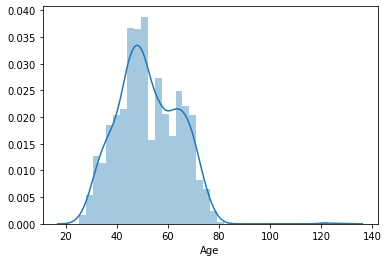

In [58]:
sns.distplot(df['Age'])
plt.show()

In [59]:
df['Age'].describe()

count    2235.000000
mean       52.191946
std        11.987584
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

In [60]:
df[df['Age']>95]

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
192,7829,PG,Single,36640.0,99,0,65,6,121,1,8
239,11004,PG,Single,60182.0,23,0,22,4,128,1,7
339,1150,PG,Not_single,83532.0,36,1,1853,15,122,0,8


This must be due error in data entry. Hence removing these 3 entries

In [61]:
df.drop(df[df['Age']>95].index,inplace=True)

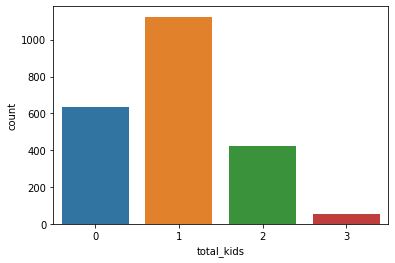

In [62]:
sns.countplot(df['total_kids'])
plt.show()

In [63]:
df.groupby(['total_kids'])['total_kids'].count()

total_kids
0     634
1    1124
2     421
3      53
Name: total_kids, dtype: int64

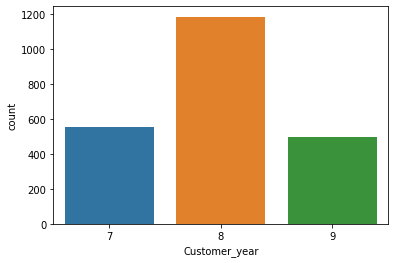

In [64]:
sns.countplot(df['Customer_year'])
plt.show()

In [65]:
df.groupby(['Customer_year'])['Customer_year'].count()

Customer_year
7     554
8    1184
9     494
Name: Customer_year, dtype: int64

## multivariate analysis

In [66]:
df.head(2)

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
0,5524,PG,Single,58138.0,58,1,1617,25,64,0,9
1,2174,PG,Single,46344.0,38,0,27,6,67,2,7


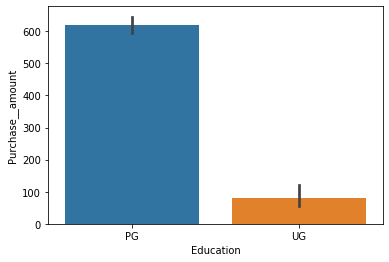

In [67]:
sns.barplot(df['Education'],df['Purchase__amount'])
plt.show()

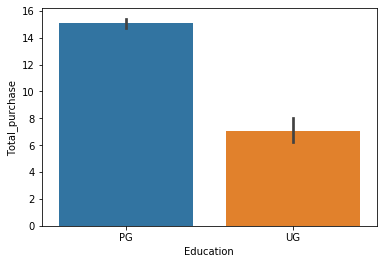

In [68]:
sns.barplot(df['Education'],df['Total_purchase'])
plt.show()

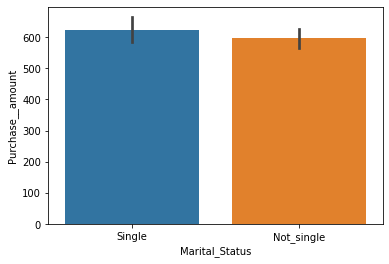

In [69]:
sns.barplot(df['Marital_Status'],df['Purchase__amount'])
plt.show()

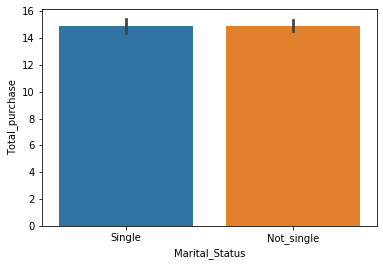

In [70]:
sns.barplot(df['Marital_Status'],df['Total_purchase'])
plt.show()

Total expense and total purachase for Single and not signle are about eqaul.

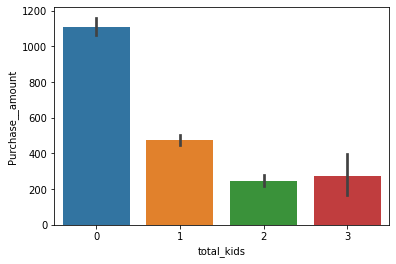

In [71]:
sns.barplot(df['total_kids'],df['Purchase__amount'])
plt.show()

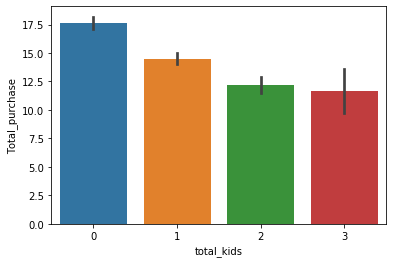

In [72]:
sns.barplot(df['total_kids'],df['Total_purchase'])
plt.show()

Customer with 0 kids spent more on purchasing.

# Data preprocessing

In [73]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [74]:
cat = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cat.append(i)

print(cat)

['Education', 'Marital_Status']


In [75]:
for x in cat:
    df[x]=df[[x]].apply(le.fit_transform)

In [76]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

In [77]:
df_val=df.drop(['ID'],axis=1)

In [78]:
scaled_features = ss.fit_transform(df_val.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df_val.index, columns=df_val.columns)

In [79]:
scaled_features_df.head()

,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
0,-0.157459,1.349720,0.294780,0.307548,0.619142,1.678383,1.319135,1.017252,-1.266206,1.499758
1,-0.157459,1.349720,-0.262793,-0.383251,-0.502550,-0.963984,-1.162208,1.273613,1.393721,-1.421237
2,-0.157459,-0.740894,0.931823,-0.797730,-0.502550,0.280753,0.796747,0.333622,-1.266206,0.039261
3,-0.157459,-0.740894,-1.194035,-0.797730,-0.502550,-0.920776,-0.901014,-1.289999,0.063757,-1.421237
4,-0.157459,-0.740894,0.302107,1.550986,-0.502550,-0.307547,0.535553,-1.033638,0.063757,-1.421237


# Clustering

In [80]:
#pip install yellowbrick

In [81]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

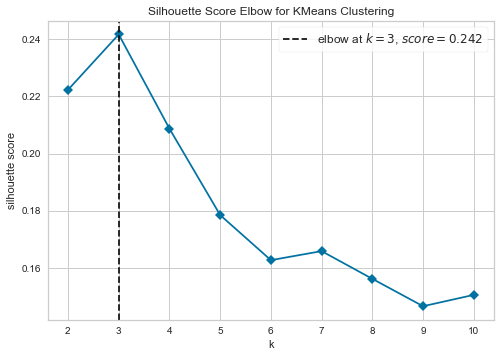

In [97]:
Elbow_M = KElbowVisualizer(KMeans(), k=10,timings=False,metric='silhouette')
Elbow_M.fit(scaled_features_df)
Elbow_M.show()
plt.show()

The above figure indicates that 3 will be an optimal number of clusters for this data.

In [98]:
kmeans=KMeans(n_clusters=3,random_state=10)

In [99]:
kmeans.fit(scaled_features_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [100]:
pred=kmeans.predict(scaled_features_df)
df['Cluster']=pred

In [101]:
df.head()

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year,Cluster
0,5524,0,1,58138.0,58,1,1617,25,64,0,9,1
1,2174,0,1,46344.0,38,0,27,6,67,2,7,0
2,4141,0,0,71613.0,26,0,776,21,56,0,8,1
3,6182,0,0,26646.0,26,0,53,8,37,1,7,0
4,5324,0,0,58293.0,94,0,422,19,40,1,7,0


# Cluster Analysis

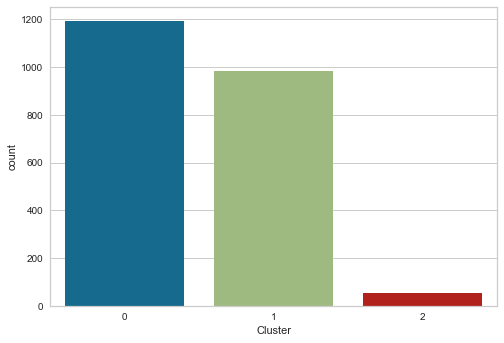

In [102]:
sns.countplot(df['Cluster'])

In [103]:
df.groupby('Cluster')['Cluster'].count()

Cluster
0    1193
1     985
2      54
Name: Cluster, dtype: int64

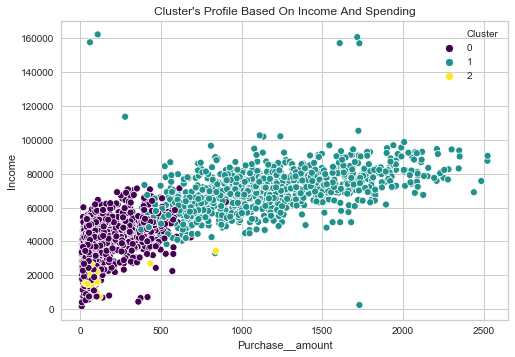

In [104]:
pl = sns.scatterplot(data = df,x=df["Purchase__amount"], y=df["Income"],hue=df["Cluster"],palette='viridis')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [119]:
df[df['Cluster']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,1193.0,5598.492875,3276.633043,9.0,2811.0,5493.0,8416.0,11191.0
Education,1193.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital_Status,1193.0,0.337804,0.473160,0.0,0.0,0.0,1.0,1.0
Income,1193.0,38072.240570,12888.428992,1730.0,29298.0,37929.0,47025.0,71427.0
Recency,1193.0,49.091366,28.971478,0.0,24.0,49.0,75.0,99.0
Campaign_accepted,1193.0,0.175189,0.454642,0.0,0.0,0.0,0.0,3.0
Purchase__amount,1193.0,156.307628,153.076214,8.0,44.0,84.0,242.0,902.0
Total_purchase,1193.0,9.682313,4.799381,1.0,6.0,8.0,12.0,29.0
Age,1193.0,50.663034,10.937380,25.0,43.0,49.0,58.0,81.0
total_kids,1193.0,1.275775,0.697713,0.0,1.0,1.0,2.0,3.0


In [118]:
df[df['Cluster']==1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,985.0,5578.491371,3204.768497,0.0,2878.0,5407.0,8475.0,11133.0
Education,985.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Marital_Status,985.0,0.373604,0.484006,0.0,0.0,0.0,1.0,1.0
Income,985.0,70385.901523,13523.961430,2447.0,62061.0,70123.0,78687.0,162397.0
Recency,985.0,49.137056,29.090839,0.0,24.0,50.0,73.0,99.0
Campaign_accepted,985.0,0.794924,1.152311,0.0,0.0,0.0,1.0,5.0
Purchase__amount,985.0,1181.795939,447.186764,59.0,835.0,1127.0,1497.0,2525.0
Total_purchase,985.0,21.649746,4.732280,1.0,18.0,21.0,25.0,44.0
Age,985.0,54.300508,12.131355,26.0,46.0,54.0,64.0,80.0
total_kids,985.0,0.572589,0.635229,0.0,0.0,1.0,1.0,3.0


In [120]:
df[df['Cluster']==2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,54.0,5396.407407,3255.016051,193.0,2483.50,5261.5,8292.50,11187.0
Education,54.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Marital_Status,54.0,0.370370,0.487438,0.0,0.00,0.0,1.00,1.0
Income,54.0,20306.259259,6235.066773,7500.0,15405.25,20744.0,24882.00,34445.0
Recency,54.0,48.444444,26.649129,2.0,29.00,48.0,68.50,94.0
Campaign_accepted,54.0,0.148148,0.407820,0.0,0.00,0.0,0.00,2.0
Purchase__amount,54.0,81.796296,123.227260,14.0,29.75,57.0,80.00,839.0
Total_purchase,54.0,7.018519,3.542149,4.0,5.00,6.0,8.00,27.0
Age,54.0,43.537037,11.536183,25.0,35.00,42.0,48.75,74.0
total_kids,54.0,0.722222,0.529031,0.0,0.00,1.0,1.00,2.0


# Conclusion

From analysis of 3 clusters:
#### 1. Cluster 0:- 
1. They have done post-graduation.
2. Most of them didn't accepted the campaign offer.
3. Thier mean income is low and also spent low on purchasing.
4. Mean age is 50.
 
#### 2. Cluster 1:-
1. They have done post-graduation.
2. Most of them accepted the campaign offer.
3. Thier mean income is highest and also spent the most on purchasing.
4. Mean age is 55.

#### 3. Cluster 2:-
1. They have done under-graduation.
2. Most of them didn't accepted the campaign offer.
3. Thier mean income is lowest and also spent least on purchasing.
4. Mean age is 43.